# Solucion en series EDO
## Trabajo 5

Presentado por:
- Evert Acosta
- Christian Giron
- Sergio Pabon

#### 1. Objetivos
- Practicar la solución de ecuaciones diferenciales usando series de
potencias, en particular con centro en puntos no singulares.
- Verificar las características y la validez de las soluciones en series
utilizando software de graficado.

#### Analisis
Resolveremos la ecuación diferencial empleando ecuación característica y series de potencia.
Al usar series de potencia contamos con la facilidad que pudimos expresar la serie en notación de sumatoria, lo cual nos
permitira realizar comparación con cualquier término, más adelante se realiza uan comparación con el término 100 de la serie.
Realizaremos comparación para los términos 1,2,3,5,7 y veremos como va evolucionando la respuesta a medida que los términos
aumentan

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def solucion_sistema2x3(row1, row2, b):
    a = np.array([row1, row2])
    b = np.array(b)
    x = np.linalg.solve(a, b)

    return x[0], x[1]

### 2. Ecuaciones lineales con coeficientes constantes (50 puntos)
Para los siguientes problemas de valor inicial:

Según su número de grupo, elija el problema de valor inicial y sus condiciones
iniciales de la siguiente tabla (se recuerda que es recomendable tomar el
centro de la serie en el mismo punto de aplicación de las condiciones iniciales):

|Grupo|EDO|Condiciones iniciales|
|:---:|:-----:|:-----:|
|$10$|$\left[D^2+9\right]y(x)=0$|$y(1)=2,y'(1)=1$|

- Resolver la ecuación utilizando los métodos vistos en la primera parte
del curso (ecuación característica).<br>
***(10 puntos)***
![ecuacion caracteristica](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo5/imagenes/IMG_2024.PNG)

C1 = -2.0270249958875133, C2 = -0.04775748274708073


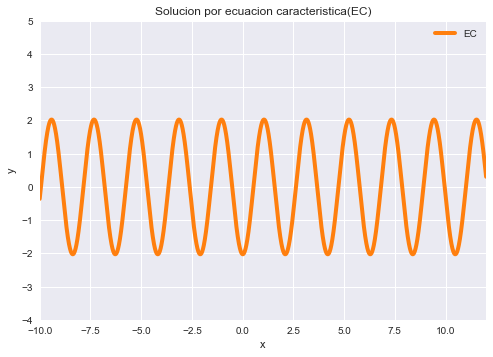

In [15]:
c1, c2 = solucion_sistema2x3([np.cos(3), np.sin(3)],[-3*np.sin(3), 3*np.cos(3)], [2, 1])
print('C1 = {}, C2 = {}'.format(c1, c2))


def y_ecuacion_caracteristica(x):
    return (c1*np.cos(3*x))+(c2*np.sin(3*x))


def ec():
    fig, ax1 = plt.subplots()

    x1 = np.linspace(-10, 12, 5000)

    y_ec = y_ecuacion_caracteristica(x1)

    plt.plot(x1, y_ec, label='EC', lw=4, color='#ff7f0e')

    ax1.set_ylim(-4, 5)
    ax1.set_xlim(-10, 12)
    ax1.legend()
    ax1.set_title('Solucion por ecuacion caracteristica(EC)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

ec()

- Resolver utilizando series de potencias (tomando como centro el punto
indicado), calcule por lo menos los 7 primeros términos diferentes de
cero.<br>
***(15 puntos)***

![series de potencias 1](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo5/imagenes/IMG_2025.PNG)
![series de potencias 2](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo5/imagenes/IMG_2026.PNG)
![series de potencias 3](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo5/imagenes/IMG_2027.PNG)
![series de potencias 4](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo5/imagenes/IMG_2028.PNG)

Ahora pasaremos la fórmula que obtuvimos al final a python, asi podremos calcular cualquier término de la serie
y realizaremos una comparación adicional a las solicitadas. Compararemos la solución obtenida usando
ecuación característica contra una solución utilizando series de potencias, pero usando el término 100, el cual es
bastante alto y nos permitira ver que tan cercana es la respuesta cercana al centro.

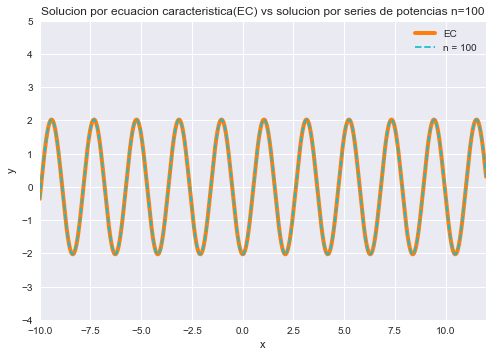

In [16]:
def y_series(i, x, a0, a1, c):

    y1 = np.zeros(len(x))
    y2 = np.zeros(len(x))

    contador = 0

    for n in range(1, i+1):
        if contador == i:
            break

        y1 += ((((-1)**(n+1))*(9**(n-1)))/(np.math.factorial((2*n)-2))) * ((x-c)**((2*n)-2))
        contador += 1

        if contador == i:
            break

        y2 += (((((-1)**(n+1))*(9**(n-1)))/(np.math.factorial((2*n)-1))) * ((x-c)**((2*n)-1)))
        contador += 1

    y = (a0*y1) + (a1*y2)

    return y

def ec_vs_series_enesimo(n):

    fig, ax1 = plt.subplots()

    x1 = np.linspace(-10, 12, 5000)

    y_ec = y_ecuacion_caracteristica(x1)

    y_series_n100 = y_series(n, x1, 2, 1, 1)

    plt.plot(x1, y_ec, label='EC', lw=4, color='#ff7f0e')
    ax1.plot(x1, y_series_n100, label='n = {}'.format(n), ls='--', color='#17becf')

    ax1.set_ylim(-4, 5)
    ax1.set_xlim(-10, 12)
    ax1.legend()
    ax1.set_title('Solucion por ecuacion caracteristica(EC) vs solucion por series de potencias n={}'.format(n))
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

ec_vs_series_enesimo(100)

- Utilice python para graficar la solución por ecuación característica y
las soluciones en serie truncadas a uno, dos, tres, cinco y siete términos
diferentes de cero. Las gráficas deben permitir la comparación entre
la solución por ecuación característica y las diferentes series truncadas,
superponiéndolas en los mismos ejes. Es responsabilidad del estudiante
definir adecuadamente los ejes, títulos, rangos, leyendas, etc, para que
esta comparación sea posible. Recuerde que las series son una aproximación
local de la solución, téngalo en cuenta a la hora de definir el
rango de valores de x a graficar.<br>
***(10 puntos)***

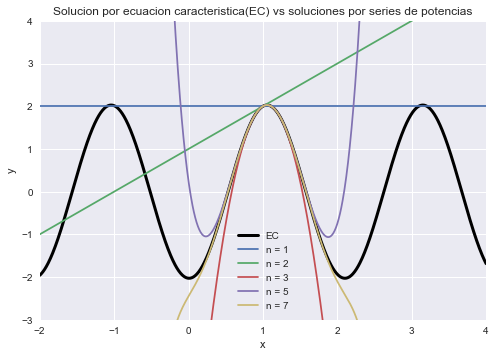

In [17]:
def ec_vs_series():

    fig, ax1 = plt.subplots()

    x1 = np.linspace(-2, 4, 1000)

    y_ec = y_ecuacion_caracteristica(x1)

    y_series_n1 = y_series(1, x1, 2, 1, 1)
    y_series_n2 = y_series(2, x1, 2, 1, 1)
    y_series_n3 = y_series(3, x1, 2, 1, 1)
    y_series_n5 = y_series(5, x1, 2, 1, 1)
    y_series_n7 = y_series(7, x1, 2, 1, 1)

    plt.plot(x1, y_ec, lw=3, label='EC', c='black')
    ax1.plot(x1, y_series_n1, label='n = 1')
    ax1.plot(x1, y_series_n2, label='n = 2')
    ax1.plot(x1, y_series_n3, label='n = 3')
    ax1.plot(x1, y_series_n5, label='n = 5')
    ax1.plot(x1, y_series_n7, label='n = 7')

    ax1.set_ylim(-3, 4)
    ax1.set_xlim(-2, 4)
    ax1.legend()
    ax1.set_title('Solucion por ecuacion caracteristica(EC) vs soluciones por series de potencias')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

ec_vs_series()


- Analice las gráficas obtenidas ¿Mejora la aproximación al utilizar más
términos de la serie? ¿Cerca al centro? ¿Lejos del centro?<br>
***(15 puntos)***

Sí mejora la aproximación al utilizar más términos de la serie. En el gráfico final
se puede observar que para los puntos alrededor del centro, es decir 1, los valores
son bastantes cercanos a los de la solución obtenida mediante ecuación característica,
mientras que los puntos más alejados del centro el valor comienza a diferir más del esperado

#### Conclusiones
La respuesta por series de potencia demostró ser bastante buena para valores cercanos al centro, pero no lo suficiente,
puesto que esa respuesta en particular solo seria util para sistemas que nos interesa su comportamiento en valores cercanos
a ese punto. En este caso en particular contamos con la facilidad de poder expresar la serie en notación de sumatoria,
lo cual nos permitio obtener términos tan altos como n=100, pero de aqui surge otro problema con las soluciones por series.
Para poder obtener respuesta de un sistema cada vés más alejado del centro tendríamos que tener en cuenta dos cosas. Primero
el radio de convergencia de la serie, si este no alcanza a cubrir nuestras necesidades tendríamos que usar otro metodo o
cambiar el centro de la serie.
Segundo la capacidad de python para calcular potencias tan altas, al usar un n=500 en las condiciones que está escrito este
programa, el programa en si devolvería un error mostrando que no es capas de manejar potencias tan altas. En este caso
se tendria que usar otras librerias que sean capaces de manejar numeros tan grandes en python. Se invita al lector
que modifique el argumento n en la llamada que se le hace a la función ec_vs_series_enesimo(100) en el segundo item de la parte
2 al final, le asigne un valor de 500 y verá el error generado.